In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import base64
import csv
import os
import seaborn as sns
import numpy as np
from glob import glob
from shutil import copyfile

%matplotlib inline

pd.set_option('display.max_columns', 100)

# Finetune VGG

In [2]:
# remote Ubuntu machine
PROJECT_DIR  = '/home/ubuntu/Extracting-food-preferences'
PICTURES_DIR = '/home/ubuntu/Extracting-food-preferences/classification_with_pics'

In [26]:
# local computer on cpu
PROJECT_DIR  = 'C:\\Users\\Natalia\\Documents\\GitHub\\Extracting-food-preferences'
PICTURES_DIR = 'C:\\Users\\Natalia\\Documents\\GitHub\\Extracting-food-preferences\\classification_with_pics'

In [3]:
%cd $PROJECT_DIR

/home/ubuntu/Extracting-food-preferences


In [4]:
from utils import *
from vgg16 import Vgg16
from datetime import datetime

%matplotlib inline

Using cuDNN version 5103 on context None
Mapped name None to device cuda: Tesla K80 (0000:00:1E.0)
Using Theano backend.


In [8]:
%cd $PICTURES_DIR

path = PICTURES_DIR + '/sample/'
results_path=path + '/results/'
train_path=path + '/train/'
valid_path=path + '/valid/'

model_path = path + '/models/'
if not os.path.exists(model_path): os.mkdir(model_path)

/home/ubuntu/Extracting-food-preferences/classification_with_pics


In [29]:
%cd $PICTURES_DIR

path = PICTURES_DIR + '\\sample\\'
results_path=path + '\\results\\'
train_path=path + '\\train\\'
valid_path=path + '\\valid\\'

model_path = path + '\\models\\'
if not os.path.exists(model_path): os.mkdir(model_path)

C:\Users\Natalia\Documents\GitHub\Extracting-food-preferences\classification_with_pics


In [9]:
#Set constants
batch_size=25
no_of_epochs=1

In [10]:
val_batches = get_batches(path+'valid', shuffle=False, batch_size=batch_size)
batches     = get_batches(path+'train', shuffle=False, batch_size=batch_size*2)

Found 50 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [11]:
val_classes = val_batches.classes
trn_classes = batches.classes
val_labels = onehot(val_classes)
trn_labels = onehot(trn_classes)

In [12]:
#import VGG16 object 
vgg = Vgg16()

In [20]:
#Finetune the model
vgg.finetune(batches)

#Not sure if we set this for all fits
vgg.model.optimizer.lr = 0.1

In [21]:
start = datetime.now()

latest_weights_filename = None
for epoch in range(no_of_epochs):
    print("Running epoch: {}".format(epoch))
    history = vgg.fit2(batches, val_batches, nb_epoch=3)
    latest_weights_filename = 'ft{}.h5'.format(epoch)
    vgg.model.save_weights(results_path+latest_weights_filename)
print("Completed {} fit operations".format(no_of_epochs))
end = datetime.now()
total = end - start
print('Time to run the script on GPU is {}'.format(total))

Running epoch: 0
Epoch 1/3
200/200 [==============================] - 5s - loss: 8.3380 - acc: 0.4050 - val_loss: 6.4472 - val_acc: 0.6000
Epoch 2/3
200/200 [==============================] - 5s - loss: 8.0590 - acc: 0.5000 - val_loss: 6.4472 - val_acc: 0.6000
Epoch 3/3
200/200 [==============================] - 5s - loss: 8.0590 - acc: 0.5000 - val_loss: 6.4472 - val_acc: 0.6000
Completed 1 fit operations
Time to run the script on GPU is 0:00:28.991699


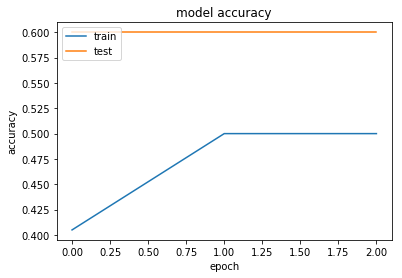

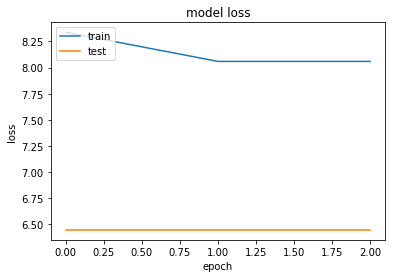

In [22]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
history

In [ ]:
1+1